# Importing some packages

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from pathlib import Path
import ta

c:\Users\vchar\anaconda3\envs\trading_bot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Testing functions

## Freq conversion

In [2]:
def convert_time_interval(input_interval):
    """
    Function to convert a time interval in hours, days, or minutes to minutes.

    Parameters:
        input_interval (str): The time interval as a string.
                              For example: '5H' for 5 hours, '3D' for 3 days, or '300T' for 300 minutes.

    Returns:
        int: The equivalent time interval in minutes.
    """
    num = int(input_interval[:-1])  # Get the number (ignore the last character 'H', 'D', or 'T').
    unit = input_interval[-1]       # Get the unit of time ('H' for hours, 'D' for days, or 'T' for minutes).

    if unit == 'H':
        return f"{int(num/10 * 60)}T", f"{num * 60}T"  # Convert hours to minutes.
    elif unit == 'D':
        return f"{int(num/10 * 24 * 60)}T", f"{num * 24 * 60}T"  # Convert days to minutes.
    elif unit == 'T':
        if num<=5:
            return f"1T", f"{num}T"  # For minutes, return the value directly.
        else:
            return f"{int(num/5)}T", f"{num}T"  # For minutes, return the value directly.
    else:
        raise ValueError("Invalid input interval. Please use 'H' for hours, 'D' for days, or 'T' for minutes.")

In [3]:
convert_time_interval('4H')

('24T', '240T')

In [14]:
def resample_data(df, granularity):
    resample = df.resample(granularity)

    df_resampled = pd.DataFrame()
    df_resampled["open"] = resample["open"].first()
    df_resampled["high"] = resample["high"].max()
    df_resampled["low"] = resample["low"].min()
    df_resampled["close"] = resample["close"].last()
    df_resampled["tick_volume"] = resample["tick_volume"].sum(min_count=1)

    return df_resampled

In [33]:
low_tf, high_tf = convert_time_interval('4H')
print(low_tf, high_tf)

path = Path(r"C:/\Users/\vchar/\OneDrive/\Desktop/\ML Projects/\portfolio/\PublicTradingBot/\data/\data_15m/\15-minutes_EURUSD.csv")
df_15m = pd.read_csv(path, index_col="time", parse_dates=True)
df_15m.head()

24T 240T


,open,high,low,close,tick_volume,low_time,high_time
time,,,,,,,
2015-01-02 10:00:00,1.20538,1.20541,1.20344,1.20410,1236,2015-01-02 10:03:00,2015-01-02 10:00:00
2015-01-02 10:15:00,1.20409,1.20479,1.20377,1.20377,638,2015-01-02 10:27:00,2015-01-02 10:21:00
2015-01-02 10:30:00,1.20373,1.20461,1.20356,1.20432,864,2015-01-02 10:30:00,2015-01-02 10:39:00
2015-01-02 10:45:00,1.20432,1.20576,1.20431,1.20553,1045,2015-01-02 10:45:00,2015-01-02 10:57:00
2015-01-02 11:00:00,1.20554,1.20673,1.20554,1.20634,1386,2015-01-02 11:00:00,2015-01-02 11:03:00


In [34]:
df_15m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216774 entries, 2015-01-02 10:00:00 to 2023-09-20 14:15:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   open         216774 non-null  float64
 1   high         216774 non-null  float64
 2   low          216774 non-null  float64
 3   close        216774 non-null  float64
 4   tick_volume  216774 non-null  int64  
 5   low_time     216770 non-null  object 
 6   high_time    216770 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 13.2+ MB


In [41]:
# df_4h = resample_data(df_15m, '4h')
df_4h = pd.read_csv('4-hours_EURUSD.csv', index_col='time', parse_dates=True)
df_4h.head()

,open,high,low,close,tick_volume,low_time,high_time
time,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00


In [42]:
df_4h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13676 entries, 2015-01-02 12:00:00 to 2023-09-20 08:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         13676 non-null  float64
 1   high         13676 non-null  float64
 2   low          13676 non-null  float64
 3   close        13676 non-null  float64
 4   tick_volume  13676 non-null  int64  
 5   low_time     13676 non-null  object 
 6   high_time    13676 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 854.8+ KB


## Features

### Autocorrelation

In [43]:
def auto_corr(df, col, n=50, lag=10):
    """
    Calculates the autocorrelation for a given column in a Pandas DataFrame, using a specified window size and lag.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the column for which to compute autocorrelation.
    - col (str): The name of the column in the DataFrame for which to calculate autocorrelation.
    - n (int, optional): The size of the rolling window for calculation. Default is 50.
    - lag (int, optional): The lag step to be used when computing autocorrelation. Default is 10.

    Returns:
    - pd.DataFrame: A new DataFrame with an additional column named 'autocorr_{lag}', where {lag} is the provided lag value. This column contains the autocorrelation values.
    """
    df_copy = df.copy()
    df_copy[f'autocorr_{lag}'] = df_copy[col].rolling(window=n, min_periods=n, center=False).apply(lambda x: x.autocorr(lag=lag), raw=False)
    return df_copy

In [47]:
df_autocorr = auto_corr(df_4h, col='close', n=50, lag=10)
df_autocorr.head(10)

,open,high,low,close,tick_volume,low_time,high_time,autocorr_10
time,,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,NaN
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,NaN
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,NaN
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,NaN
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,NaN
2015-01-05 04:00:00,1.19623,1.19726,1.19350,1.19405,11188,2015-01-05 07:12:00,2015-01-05 04:24:00,NaN
2015-01-05 08:00:00,1.19405,1.19757,1.19253,1.19547,16325,2015-01-05 08:48:00,2015-01-05 11:36:00,NaN
2015-01-05 12:00:00,1.19548,1.19601,1.18866,1.18991,20361,2015-01-05 15:36:00,2015-01-05 12:24:00,NaN
2015-01-05 16:00:00,1.18991,1.19410,1.18923,1.19172,21638,2015-01-05 16:00:00,2015-01-05 18:24:00,NaN


In [48]:
df_autocorr.tail()

,open,high,low,close,tick_volume,low_time,high_time,autocorr_10
time,,,,,,,,
2023-09-19 16:00:00,1.06997,1.07014,1.06785,1.06848,13607,2023-09-19 19:36:00,2023-09-19 16:00:00,0.082399
2023-09-19 20:00:00,1.06848,1.06918,1.06761,1.06790,6544,2023-09-19 22:00:00,2023-09-19 20:24:00,0.110672
2023-09-20 00:00:00,1.06790,1.06860,1.06768,1.06849,2478,2023-09-20 00:00:00,2023-09-20 03:36:00,0.125906
2023-09-20 04:00:00,1.06849,1.06897,1.06783,1.06786,4333,2023-09-20 06:24:00,2023-09-20 05:12:00,0.150453
2023-09-20 08:00:00,1.06786,1.06972,1.06730,1.06964,11014,2023-09-20 08:48:00,2023-09-20 11:36:00,0.148199


In [46]:
df_autocorr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13676 entries, 2015-01-02 12:00:00 to 2023-09-20 08:00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         13676 non-null  float64
 1   high         13676 non-null  float64
 2   low          13676 non-null  float64
 3   close        13676 non-null  float64
 4   tick_volume  13676 non-null  int64  
 5   low_time     13676 non-null  object 
 6   high_time    13676 non-null  object 
 7   autocorr_10  13627 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 961.6+ KB


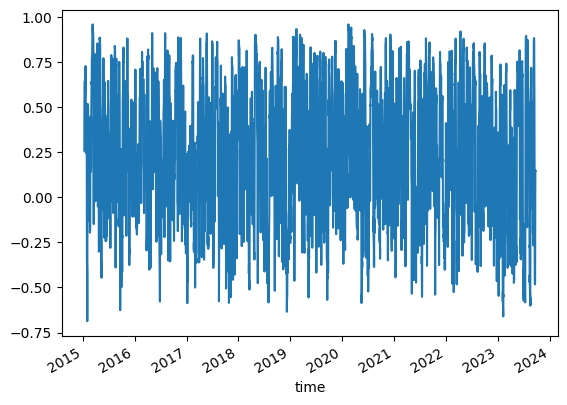

In [50]:
df_autocorr["autocorr_10"].plot();

### Candle info

In [51]:
def candle_information(df):
    df_copy = df.copy()
    # Candle color
    df_copy["candle_way"] = -1
    df_copy.loc[(df_copy["open"] - df_copy["close"]) < 0, "candle_way"] = 1

    # Filling percentage
    df_copy["filling"] = np.abs(df_copy["close"] - df_copy["open"]) / np.abs(df_copy["high"] - df_copy["low"])

    # Amplitude
    df_copy["amplitude"] = np.abs(df_copy["close"] - df_copy["open"]) / (df_copy["open"] / 2 + df_copy["close"] / 2) * 100

    return df_copy

df_candle = candle_information(df_4h)
df_candle.head()

,open,high,low,close,tick_volume,low_time,high_time,candle_way,filling,amplitude
time,,,,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,-1,0.355731,0.074737
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,-1,0.668478,0.204567
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,-1,0.727273,0.086608
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,-1,0.275862,0.013331
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,1,0.152740,0.142213


In [52]:
df_candle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13676 entries, 2015-01-02 12:00:00 to 2023-09-20 08:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         13676 non-null  float64
 1   high         13676 non-null  float64
 2   low          13676 non-null  float64
 3   close        13676 non-null  float64
 4   tick_volume  13676 non-null  int64  
 5   low_time     13676 non-null  object 
 6   high_time    13676 non-null  object 
 7   candle_way   13676 non-null  int64  
 8   filling      13676 non-null  float64
 9   amplitude    13676 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


### KAMA

In [55]:
def kama(df, col, n):
    df_copy = df.copy()
    df_copy[f"kama_{n}"] = ta.momentum.KAMAIndicator(df_copy[col], n).kama()
    return df_copy

df_kama = kama(df_4h, col='close', n=10)
df_kama = kama(df_kama, col='close', n=100)
df_kama.head()

,open,high,low,close,tick_volume,low_time,high_time,kama_10,kama_100
time,,,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,NaN,NaN
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,NaN,NaN
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,NaN,NaN
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,NaN,NaN
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,NaN,NaN


In [56]:
df_kama.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13676 entries, 2015-01-02 12:00:00 to 2023-09-20 08:00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         13676 non-null  float64
 1   high         13676 non-null  float64
 2   low          13676 non-null  float64
 3   close        13676 non-null  float64
 4   tick_volume  13676 non-null  int64  
 5   low_time     13676 non-null  object 
 6   high_time    13676 non-null  object 
 7   kama_10      13667 non-null  float64
 8   kama_100     13577 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


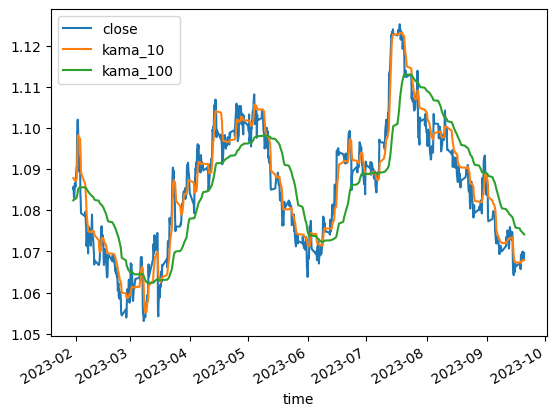

In [58]:
df_kama[['close', 'kama_10', 'kama_100']].iloc[-1000:].plot();